In [1]:
# TODO: Add import statements
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('datasets/data.csv')
X = train_data.Var_X.values.reshape(-1, 1)
y = train_data.Var_Y.values

In [3]:
def make_poly(X, y, deg=2):
    # Create polynomial features
    # TODO: Create a PolynomialFeatures object, then fit and transform the
    # predictor feature
    poly_feat = PolynomialFeatures(deg)
    X_poly = poly_feat.fit_transform(X)
    
    # Create a LinearRegression object and fit it to the 
    # polynomial predictor features
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)

    # make a prediction
    y_hat = poly_model.predict(X_poly)
    return y_hat

In [4]:
def plot_poly(X, y, y_hat):
    # Visualizing the fit
    sns.set(font_scale=1.3)
    plt.figure(figsize=(10,6))
    plt.scatter(X, y,  color='blue')
    plt.plot(X, y_hat, '-r' )
    plt.xlabel("BMI")
    plt.ylabel("Life-Expectancy")
    plt.show()

Let's use different degrees to see how the prediction model fits the data

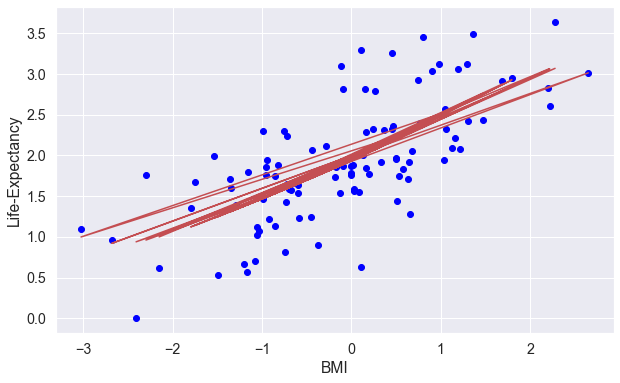

In [24]:
deg = 5
y_hat = make_poly(X, y, deg)
plot_poly(X, y, y_hat)

In [25]:
def distribution_plot(red_funct, blue_funct, red_name, blue_name, Title):
    plt.figure(figsize=(10,8))
    ax1 = sns.distplot(red_funct, hist=False, color='r', label= red_name)
    ax2 = sns.distplot(blue_funct, hist=False, color='b', label= blue_name, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('BMI')
    plt.ylabel('Life-Expectancy')
    
    plt.show()
    plt.close()

c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


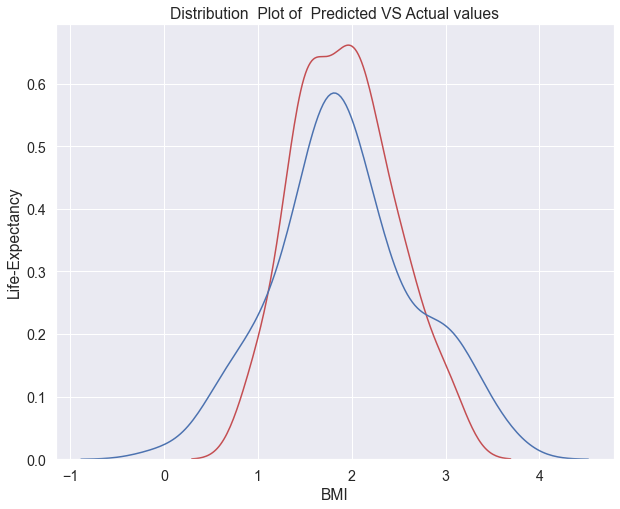

In [26]:
Title = 'Distribution  Plot of  Predicted VS Actual values'
distribution_plot(y_hat, y, 'Predicted', 'Actual', Title)